In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
# Define the model inputs
problem = {
    'num_vars': 4,
    'names': ["Electron_Density", 'Electric_Field', 'N2_Fraction', 'Temperature'],
    'bounds': [[5e7, 5e9],
               [0.05, 0.12],
               [0., 1.],
               [300., 600.]
              ]
}

# Generate samples
param_values = saltelli.sample(problem, 5000)

In [2]:
np.savetxt('sobol_vals.txt', param_values)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
from qtplaskin import FastDirData
from scipy.interpolate import RBFInterpolator, NearestNDInterpolator


# Group Species Plots

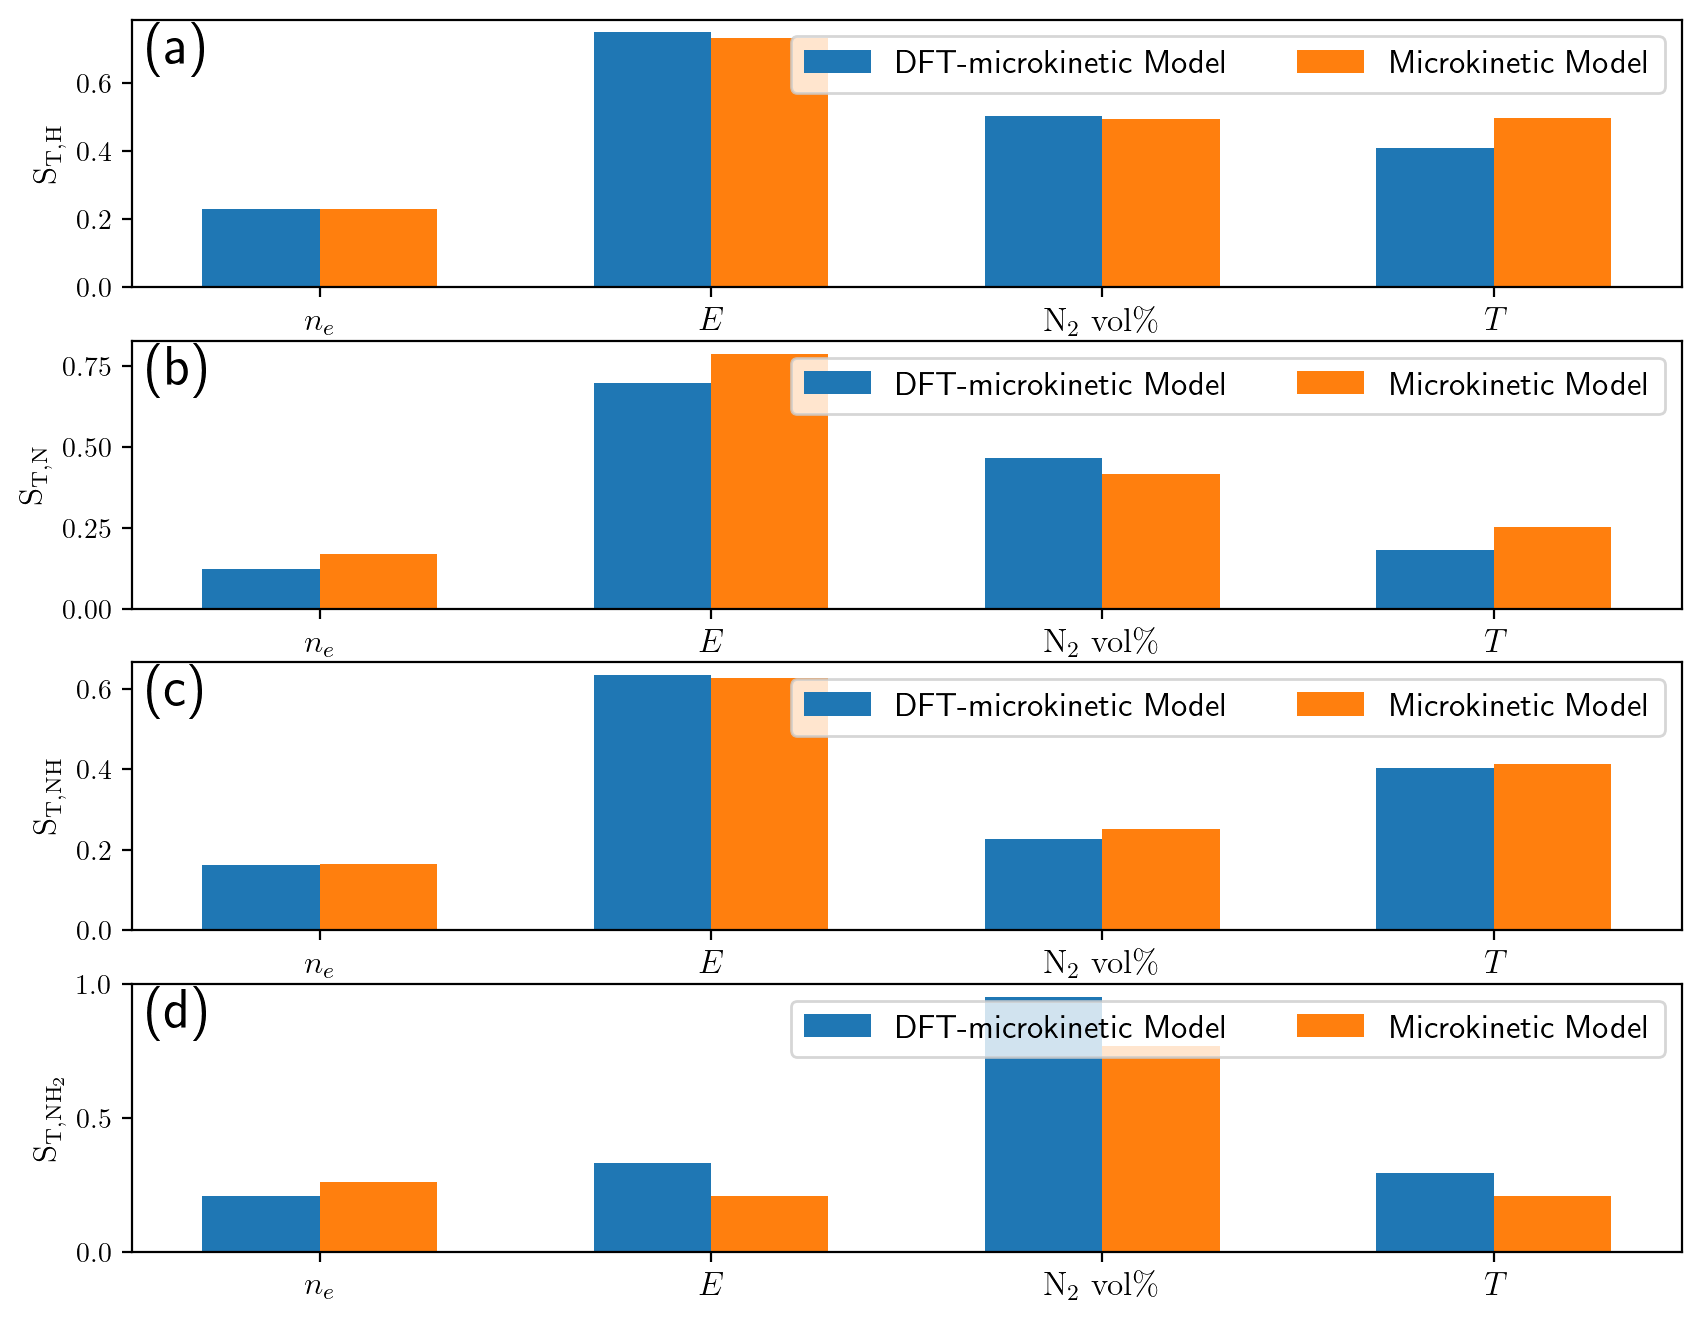

In [81]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(4, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = ['$\mathrm{S}_{\mathrm{T}, \mathrm{H}}$',
       '$\mathrm{S}_{\mathrm{T}, \mathrm{N}}$',
       '$\mathrm{S}_{\mathrm{T}, \mathrm{NH}}$',
       '$\mathrm{S}_{\mathrm{T}, \mathrm{NH}_2}$',]
for id_id, reac_id in enumerate([29, 13, 34, 35]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)
        
    spec_ans_extract = np.array(spec_ans_extract)
    spec_ans_extract = spec_ans_extract[:,reac_id]
    spec_ans_extract = (spec_ans_extract-np.min(spec_ans_extract))/(np.max(spec_ans_extract)-np.min(spec_ans_extract))
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(spec_ans_extract) != 0.0)[0]], np.array(spec_ans_extract)[np.where(np.array(spec_ans_extract) != 0.0)[0]])
    spec_ans_extract[np.where(spec_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(spec_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, spec_ans_extract)
    
    spec_ans_base = np.array(spec_ans_base)
    spec_ans_base = spec_ans_base[:,reac_id]
    spec_ans_base = (spec_ans_base-np.min(spec_ans_base))/(np.max(spec_ans_base)-np.min(spec_ans_base))
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(spec_ans_base) != 0.0)[0]], np.array(spec_ans_base)[np.where(np.array(spec_ans_base) != 0.0)[0]])
    spec_ans_base[np.where(spec_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(spec_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, spec_ans_base)
    
    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

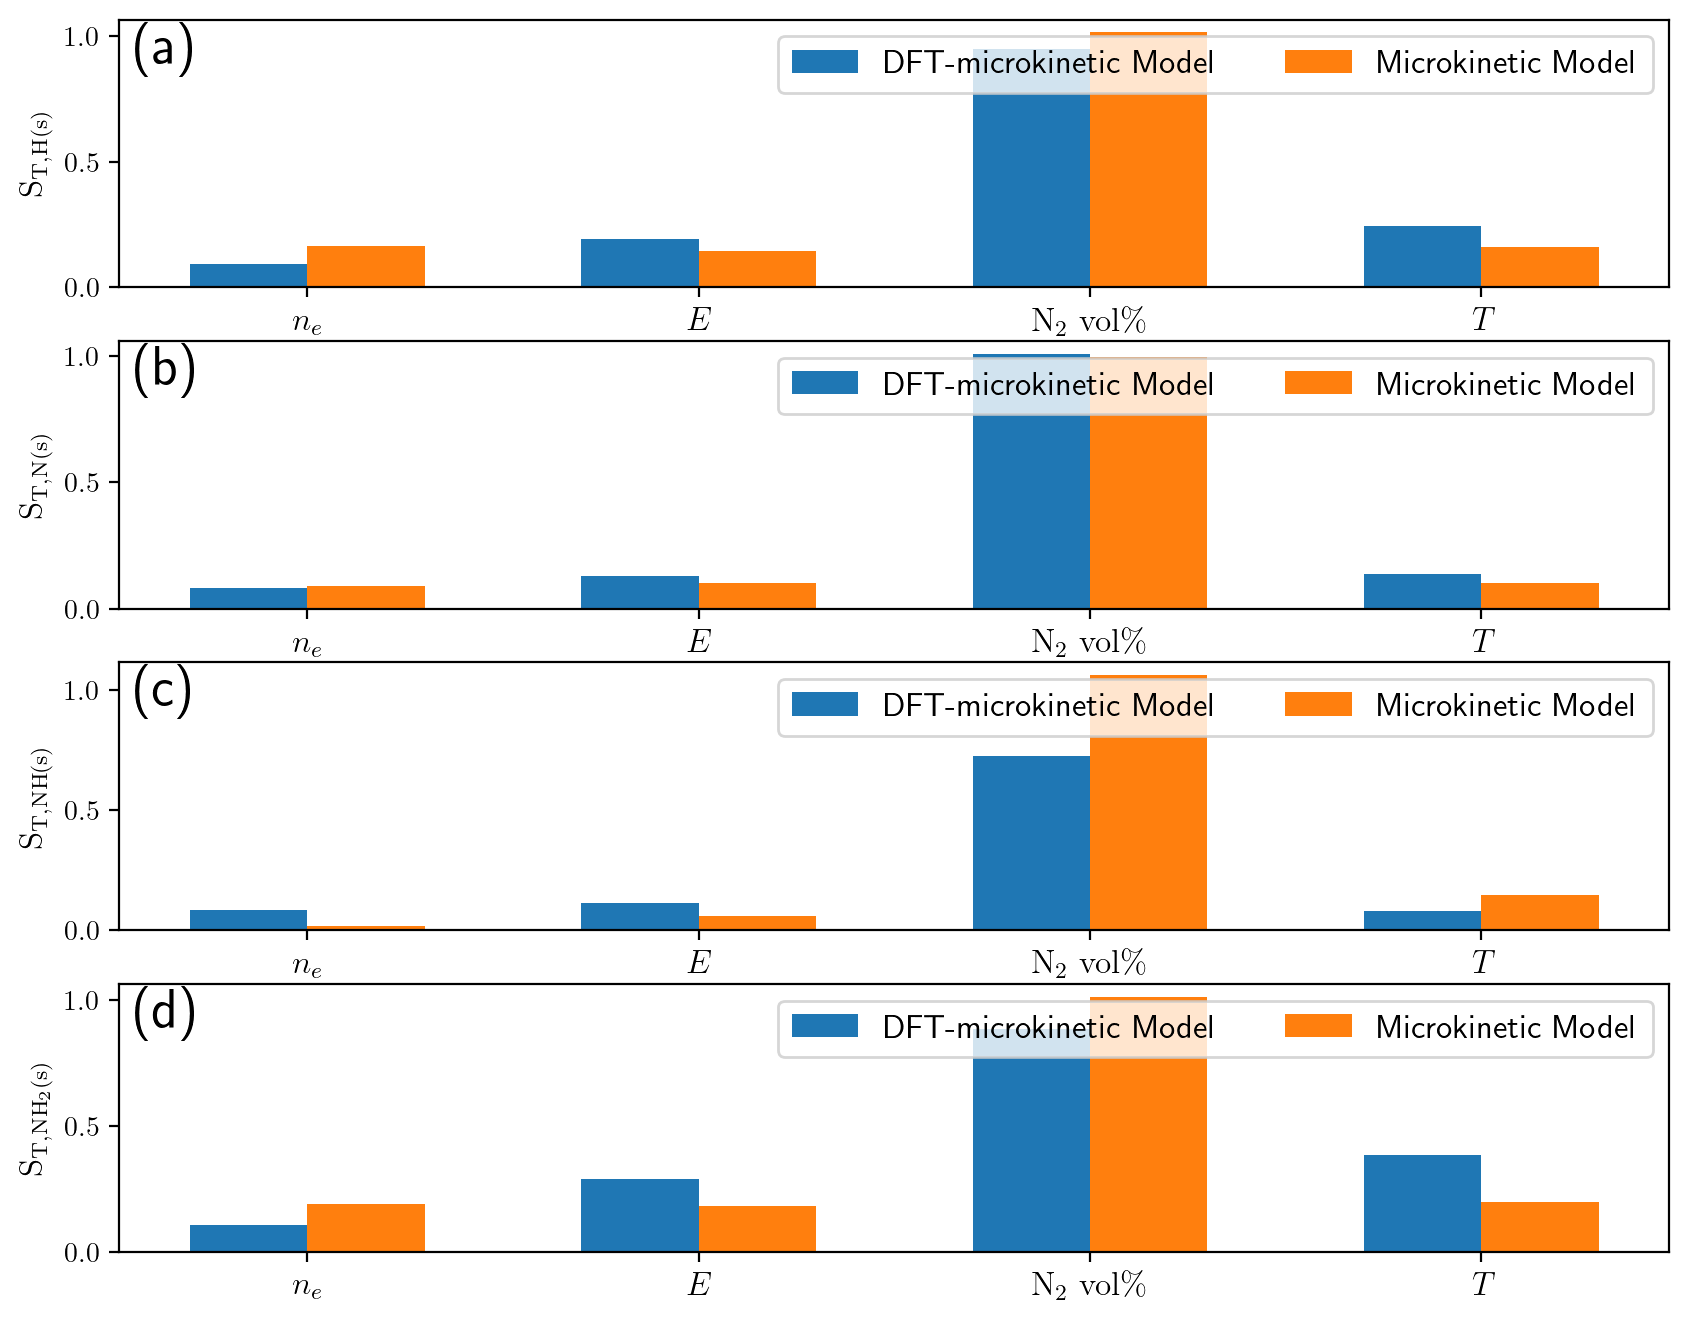

In [82]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(4, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}_2\mathrm{(s)}}$',]
for id_id, reac_id in enumerate([44, 45, 46, 47]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)
        
    spec_ans_extract = np.array(spec_ans_extract)
    spec_ans_extract = spec_ans_extract[:,reac_id]
    spec_ans_extract = (spec_ans_extract-np.min(spec_ans_extract))/(np.max(spec_ans_extract)-np.min(spec_ans_extract))
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(spec_ans_extract) != 0.0)[0]], np.array(spec_ans_extract)[np.where(np.array(spec_ans_extract) != 0.0)[0]])
    spec_ans_extract[np.where(spec_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(spec_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, spec_ans_extract)
    
    spec_ans_base = np.array(spec_ans_base)
    spec_ans_base = spec_ans_base[:,reac_id]
    spec_ans_base = (spec_ans_base-np.min(spec_ans_base))/(np.max(spec_ans_base)-np.min(spec_ans_base))
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(spec_ans_base) != 0.0)[0]], np.array(spec_ans_base)[np.where(np.array(spec_ans_base) != 0.0)[0]])
    spec_ans_base[np.where(spec_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(spec_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, spec_ans_base)
    
    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

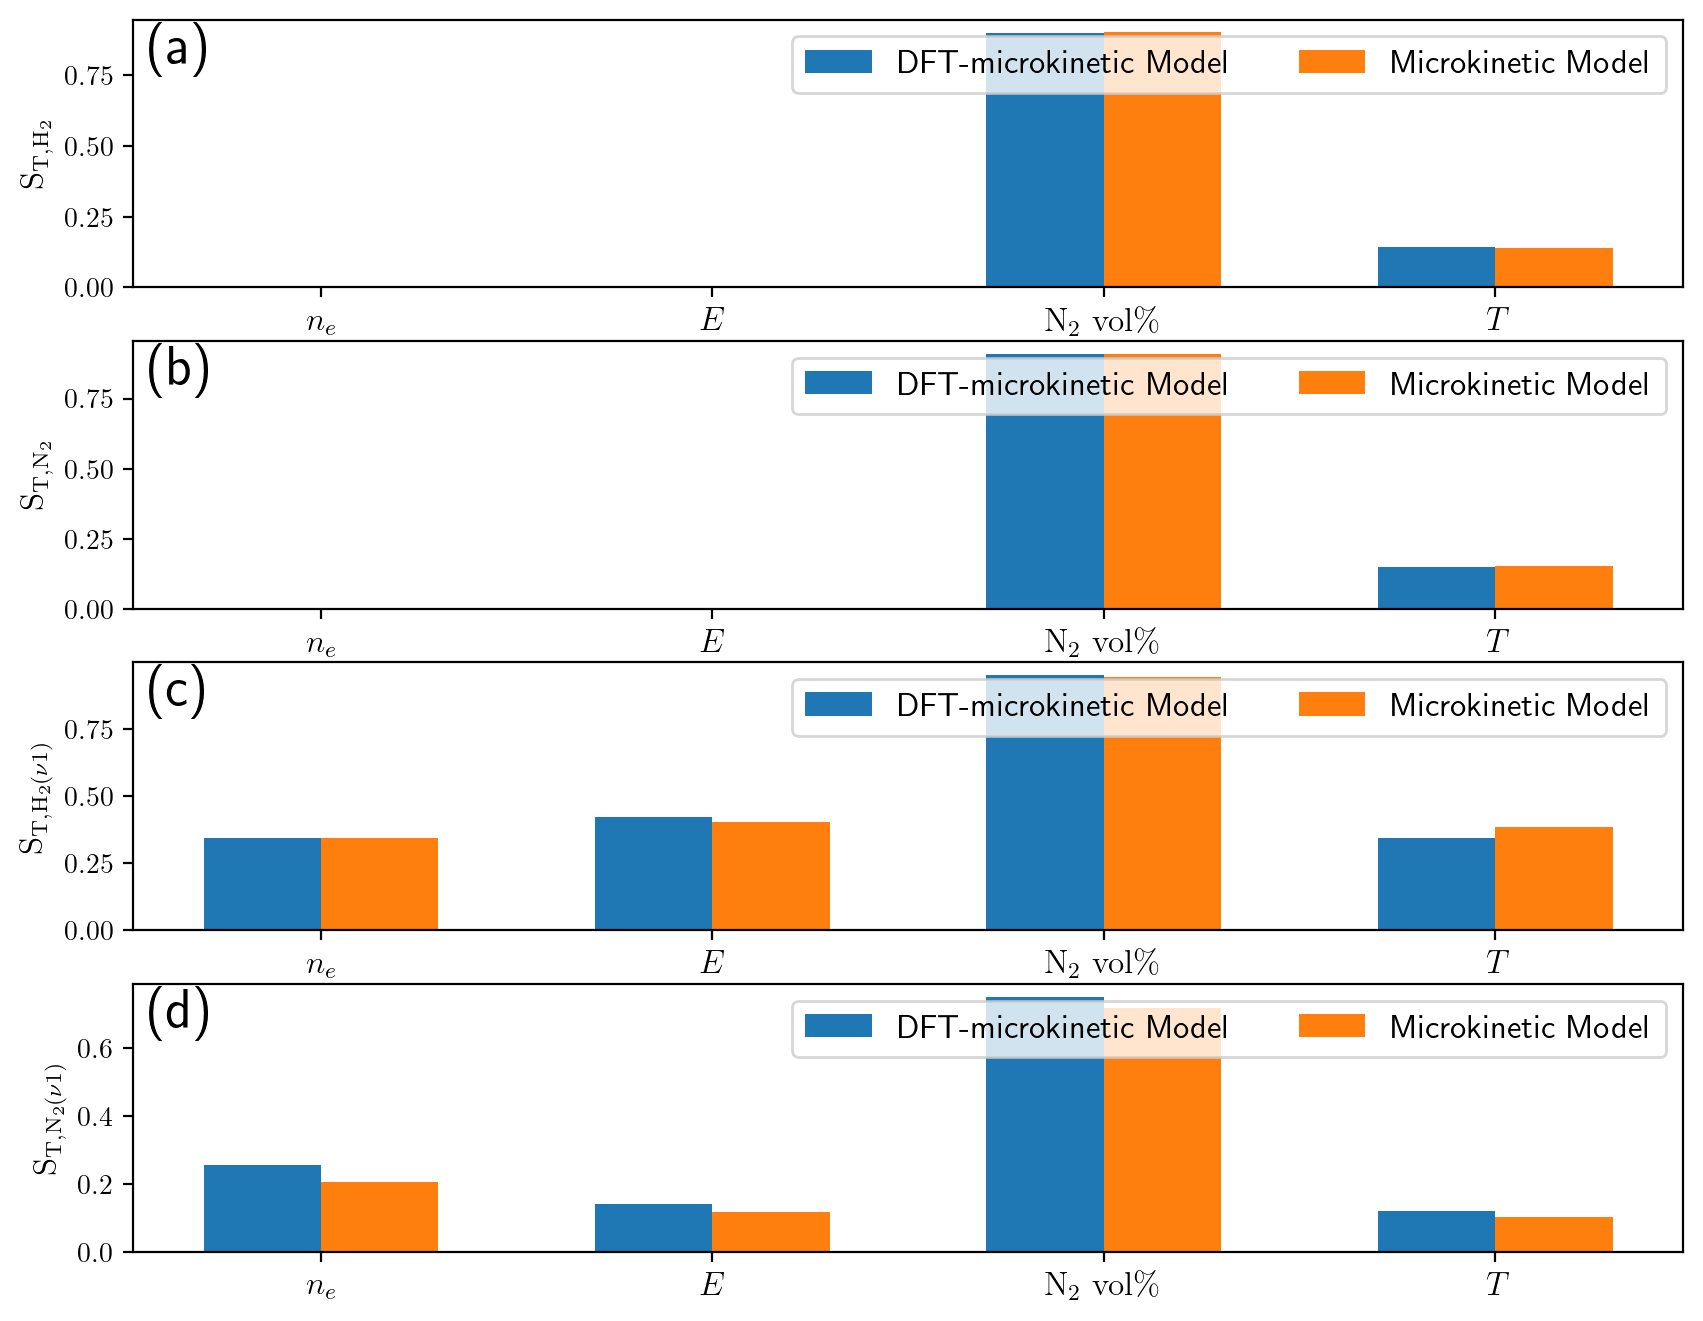

In [83]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(4, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}_2}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}_2}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}_2(\nu 1)}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}_2(\nu 1)}$',]
for id_id, reac_id in enumerate([20, 0, 26, 1]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)
        
    spec_ans_extract = np.array(spec_ans_extract)
    spec_ans_extract = spec_ans_extract[:,reac_id]
    spec_ans_extract = (spec_ans_extract-np.min(spec_ans_extract))/(np.max(spec_ans_extract)-np.min(spec_ans_extract))
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(spec_ans_extract) != 0.0)[0]], np.array(spec_ans_extract)[np.where(np.array(spec_ans_extract) != 0.0)[0]])
    spec_ans_extract[np.where(spec_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(spec_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, spec_ans_extract)

    spec_ans_base = np.array(spec_ans_base)
    spec_ans_base = spec_ans_base[:,reac_id]
    spec_ans_base = (spec_ans_base-np.min(spec_ans_base))/(np.max(spec_ans_base)-np.min(spec_ans_base))
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(spec_ans_base) != 0.0)[0]], np.array(spec_ans_base)[np.where(np.array(spec_ans_base) != 0.0)[0]])
    spec_ans_base[np.where(spec_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(spec_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, spec_ans_base)
    
    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

# group plot

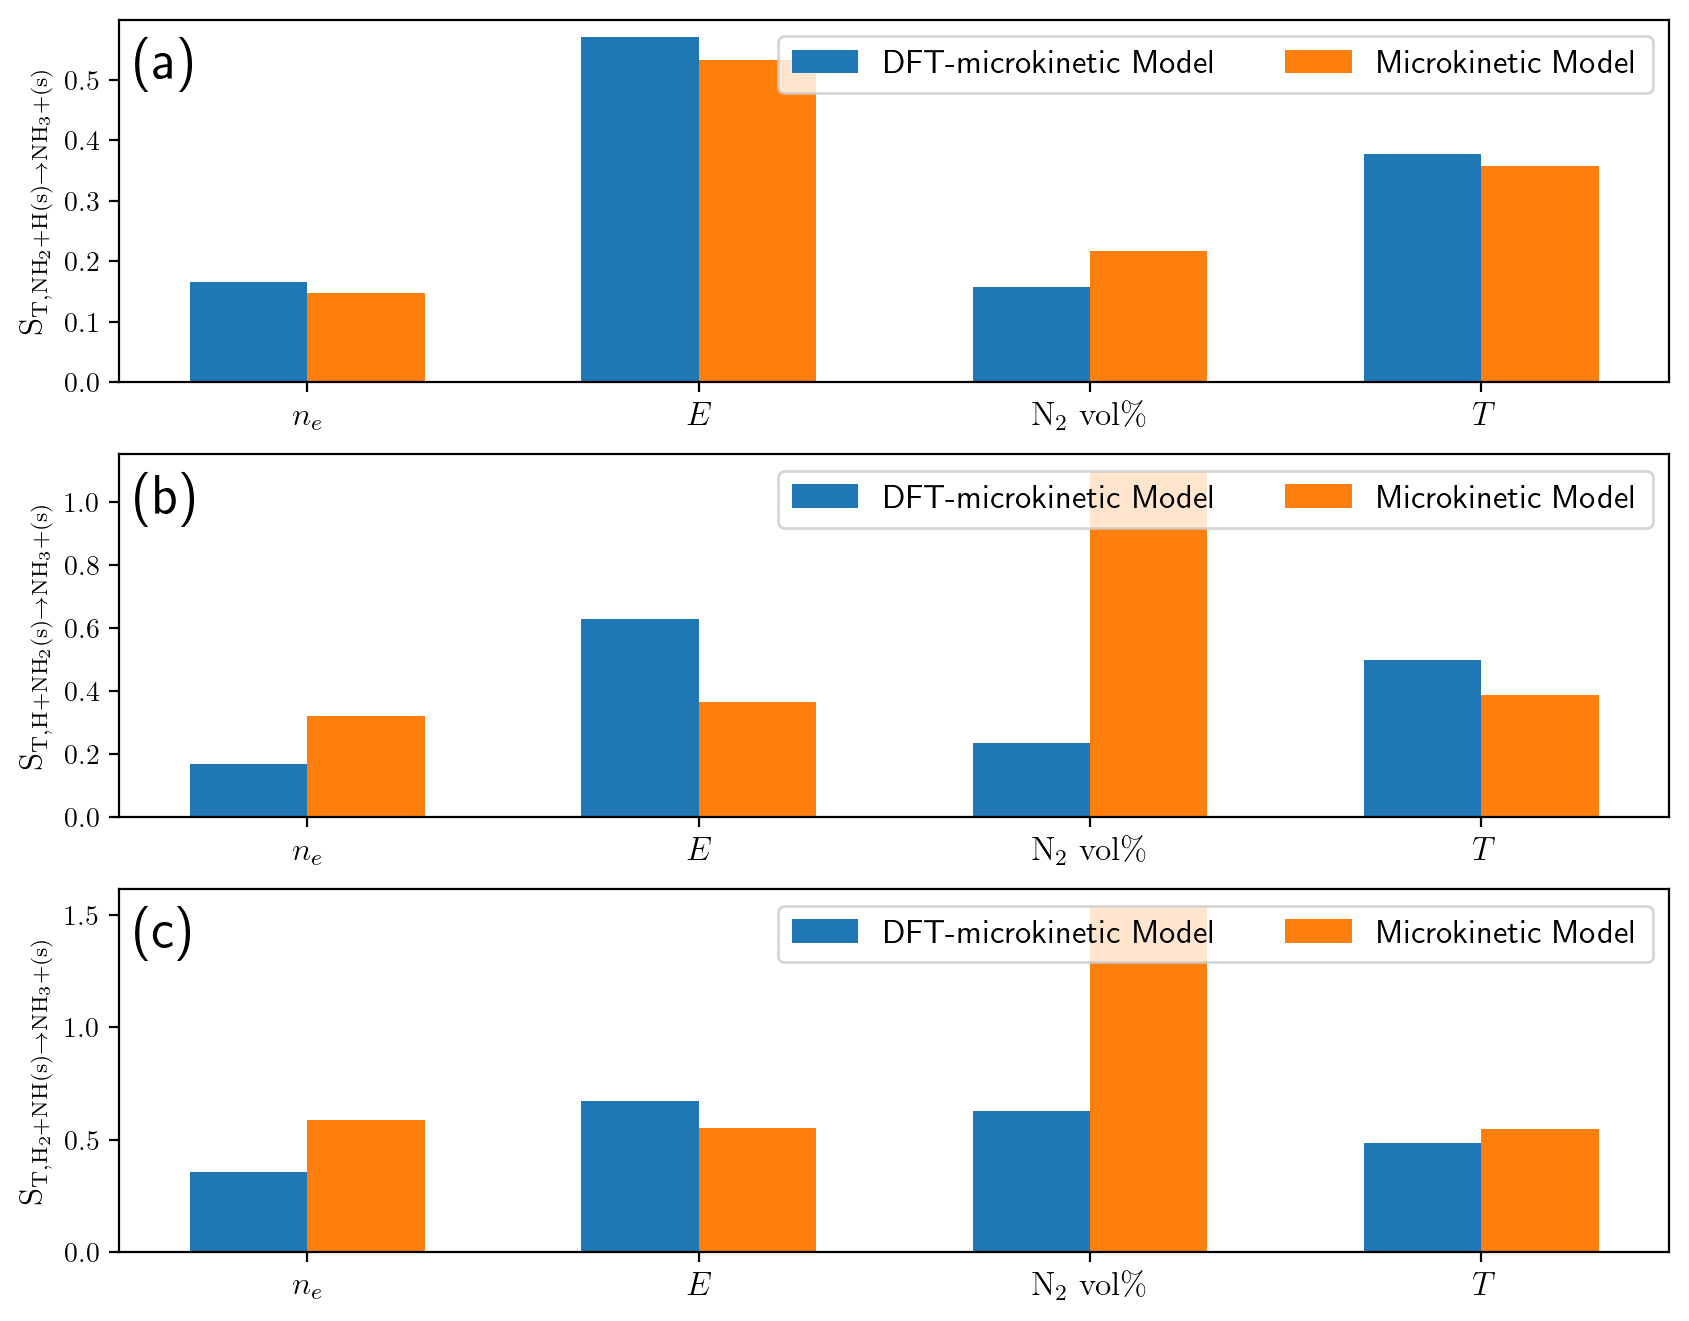

In [80]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(3, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}_2+\mathrm{H}\mathrm{(s)} \rightarrow \mathrm{NH}_3+\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}+\mathrm{NH}_2\mathrm{(s)} \rightarrow \mathrm{NH}_3+\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}_2+\mathrm{NH}\mathrm{(s)} \rightarrow \mathrm{NH}_3+\mathrm{(s)}}$']
for id_id, reac_id in enumerate([483, 486, 487]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

In [133]:
d.reactions

['bolsig:N2->N2(A3,V0-4)',
 'bolsig:N2->N2(A3,V5-9)',
 'bolsig:N2->N2(A3,V10-)',
 'bolsig:N2->N2(B3)',
 'bolsig:N2->N2(A`1)',
 'bolsig:N2->N2(C3)',
 'bolsig:H2->H2(B3SIG)',
 'bolsig:H2->H2(B1SIG)',
 'bolsig:H2->H2(C3PI)',
 'bolsig:H2->H2(A3SIG)',
 'bolsig:H2->H2(RYDBERG_SUM)',
 'bolsig:N2->N2^+',
 'bolsig:H2->H2^+',
 'E+N=>E+E+N^+',
 'E+H=>H^++E+E',
 'E+NH3=>E+E+NH3^+',
 'bolsig:N2->N2(V1)',
 'bolsig:N2->N2(V2)',
 'bolsig:N2->N2(V3)',
 'bolsig:N2->N2(V4)',
 'bolsig:N2->N2(V5)',
 'bolsig:N2->N2(V6)',
 'bolsig:N2->N2(V7)',
 'bolsig:N2->N2(V8)',
 'bolsig:N2(V1)->N2',
 'bolsig:N2(V2)->N2',
 'bolsig:N2(V3)->N2',
 'bolsig:N2(V4)->N2',
 'bolsig:N2(V5)->N2',
 'bolsig:N2(V6)->N2',
 'bolsig:N2(V7)->N2',
 'bolsig:N2(V8)->N2',
 'bolsig:H2->H2(V1)',
 'bolsig:H2->H2(V2)',
 'bolsig:H2->H2(V3)',
 'bolsig:H2(V1)->H2',
 'bolsig:H2(V2)->H2',
 'bolsig:H2(V3)->H2',
 'bolsig:H2(B3SIG)->H2',
 'bolsig:H2(B1SIG)->H2',
 'bolsig:H2(C3PI)->H2',
 'bolsig:H2(A3SIG)->H2',
 'N2(V1)+N2=>N2+N2',
 'N2+N2=>N2(V1)+N2',
 '

In [146]:
np.where(np.array(d.reactions)=="E+NH2=>E+N+H2")

(array([288]),)

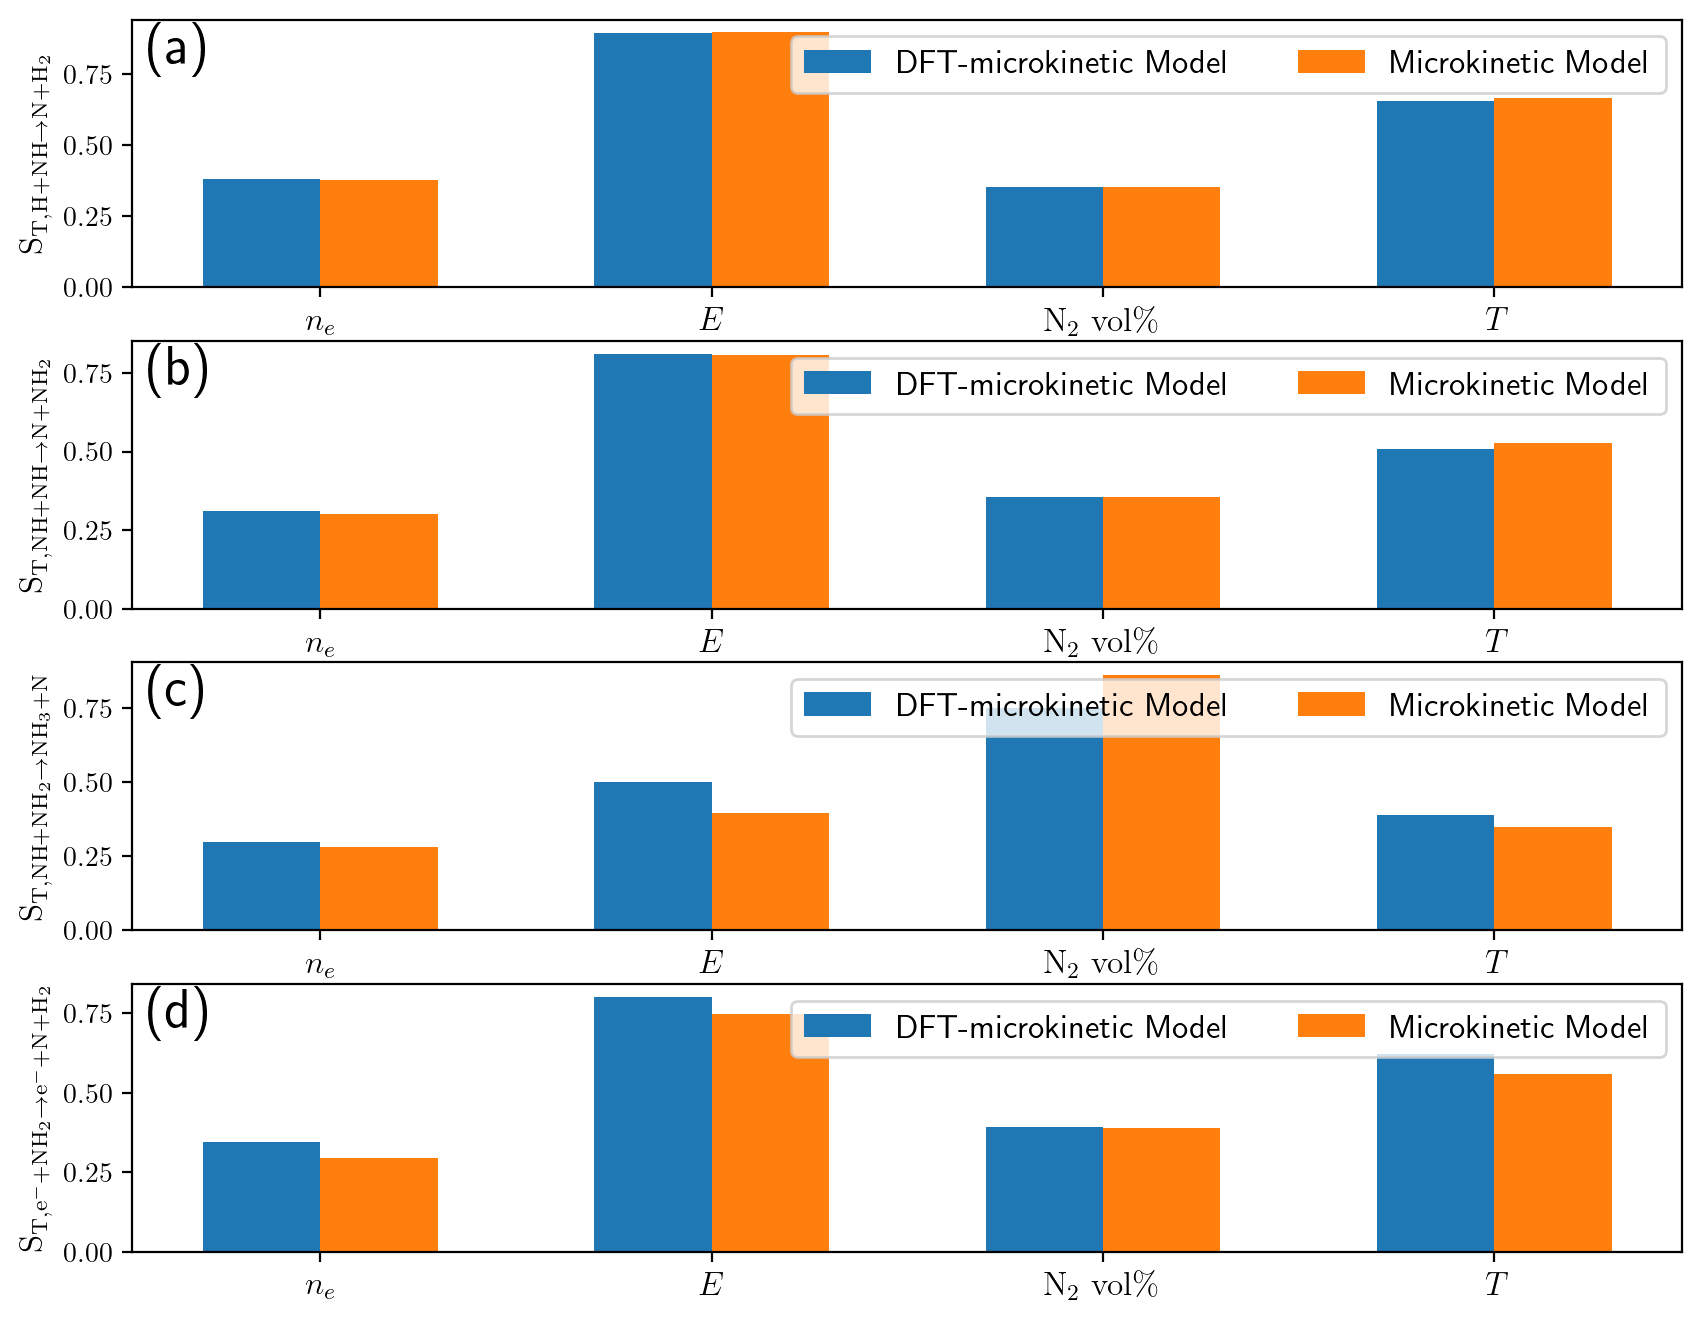

In [147]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(4, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}+\mathrm{NH}\rightarrow\mathrm{N}+\mathrm{H}_2}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}+\mathrm{NH}\rightarrow\mathrm{N}+\mathrm{NH}_2}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}+\mathrm{NH}_2\rightarrow\mathrm{NH}_3+\mathrm{N}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_2 \rightarrow \mathrm{e}^- +\mathrm{N}+\mathrm{H}_2}$',]
for id_id, reac_id in enumerate([372, 374, 379, 288]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

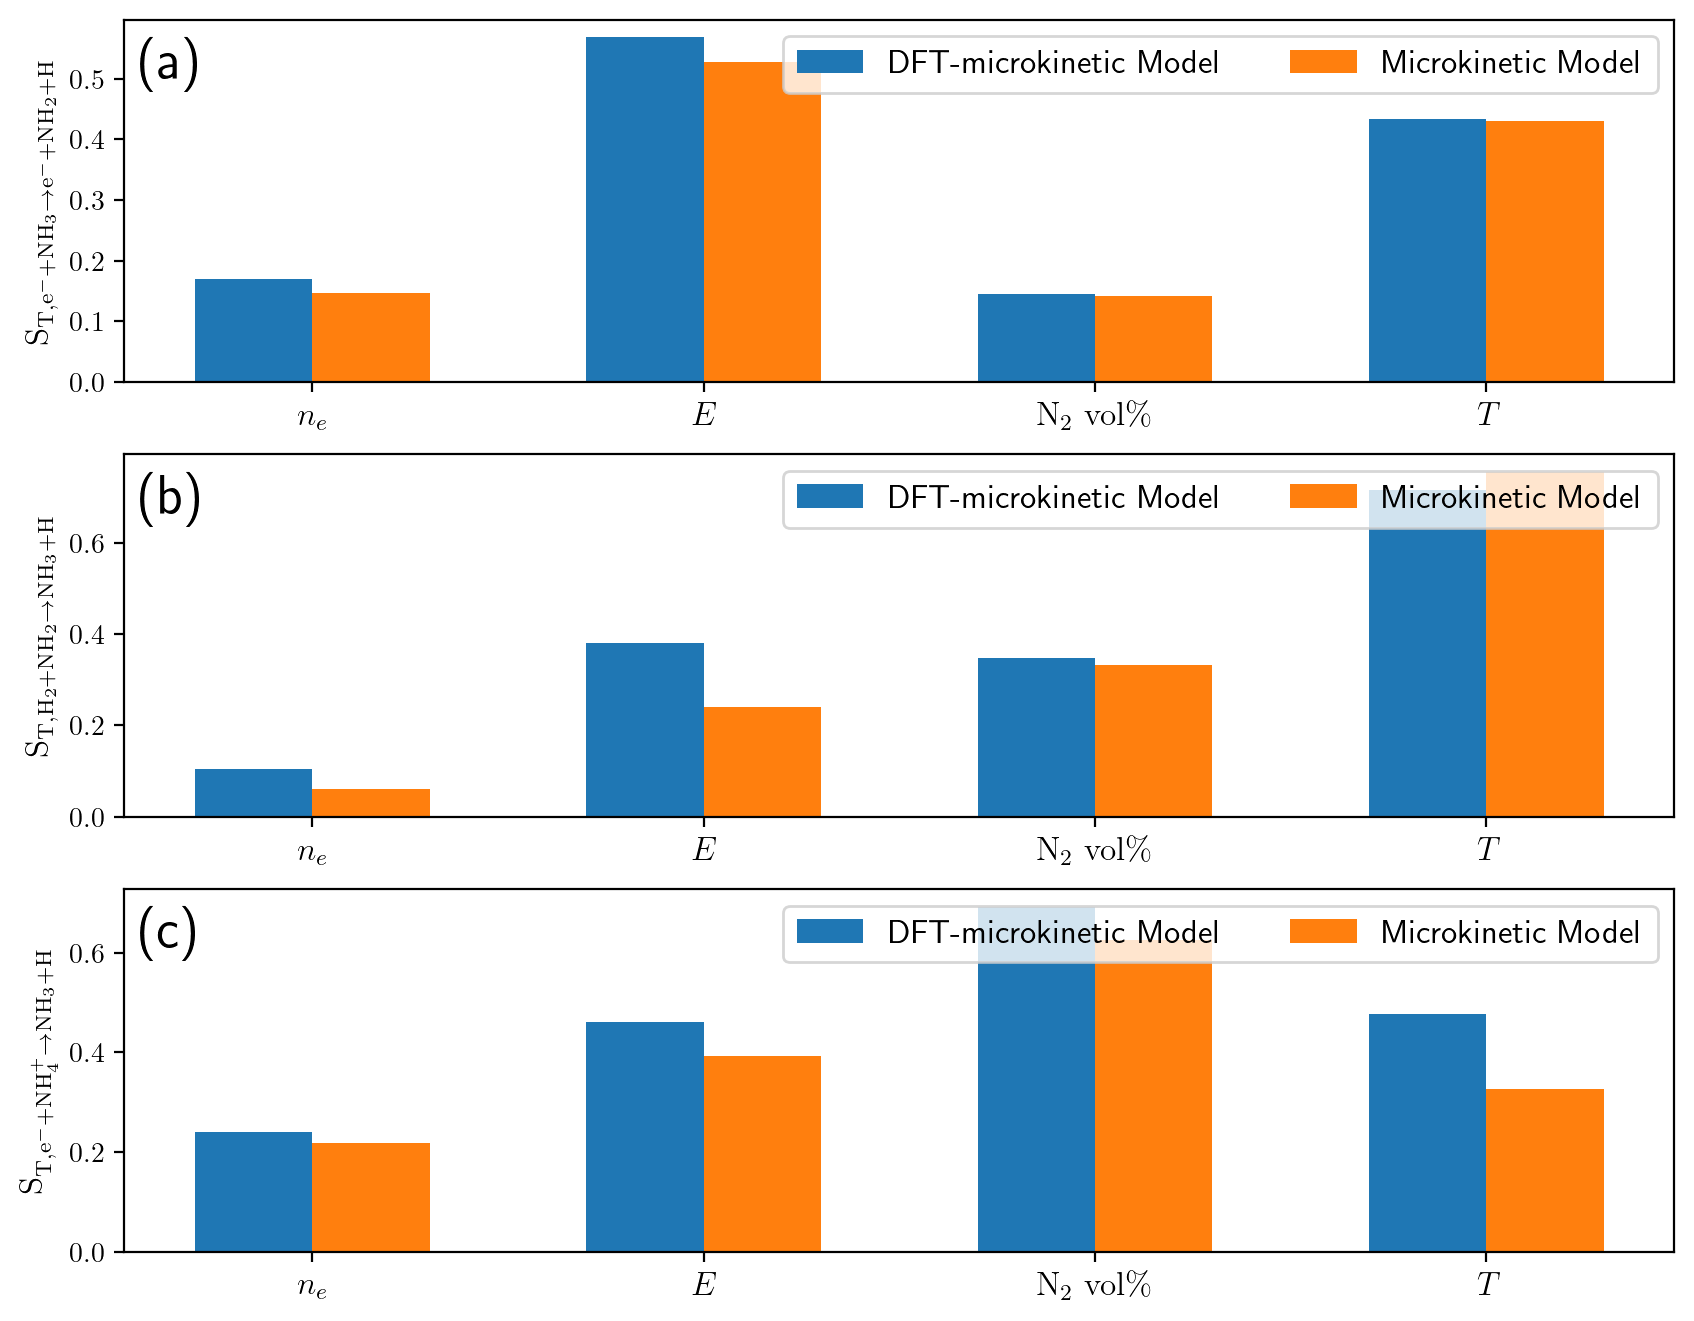

In [144]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(3, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_3\rightarrow\mathrm{e}^-+\mathrm{NH}_2+\mathrm{H}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}_2+\mathrm{NH}_2\rightarrow\mathrm{NH}_3+\mathrm{H}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_4^+\rightarrow\mathrm{NH}_3+\mathrm{H}}$',]
for id_id, reac_id in enumerate([290, 380, 306]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

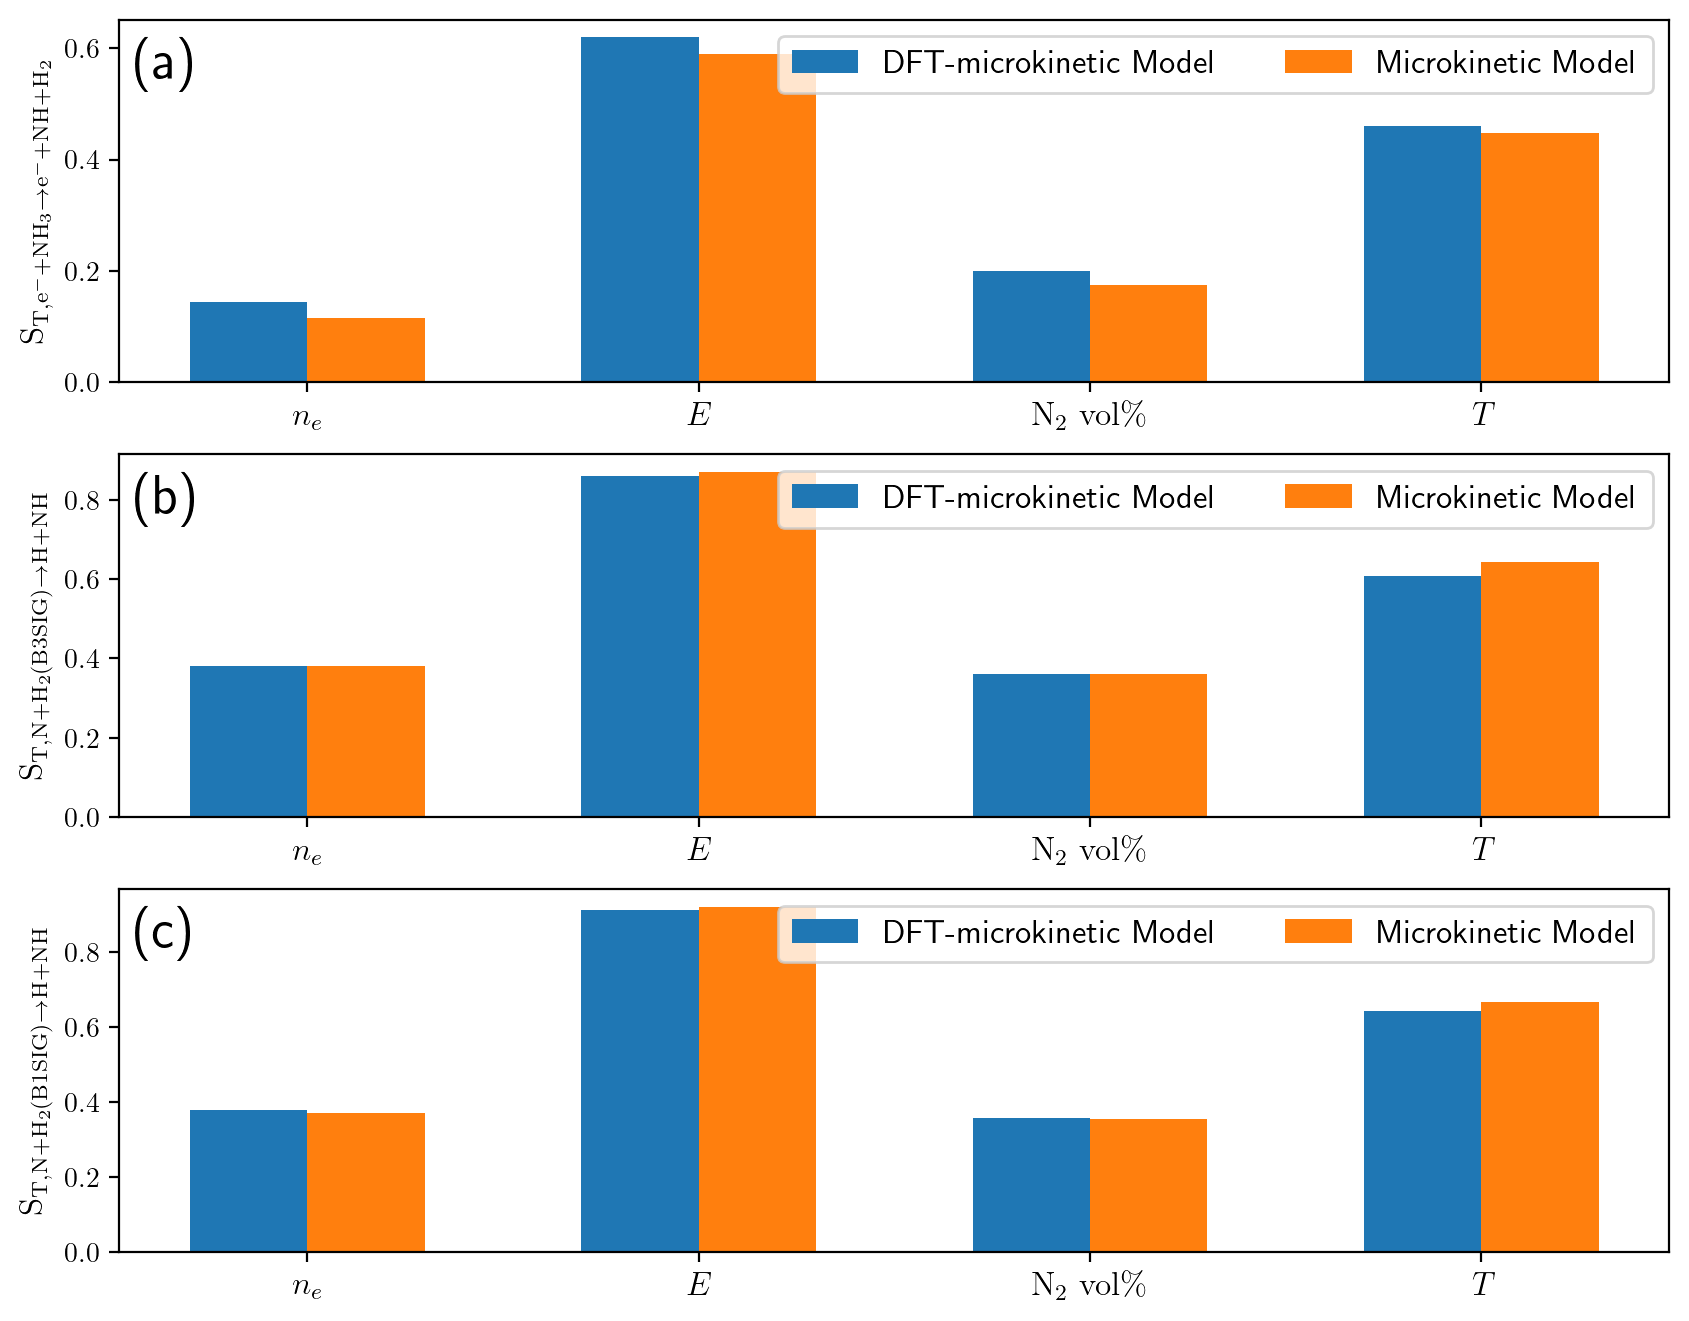

In [132]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(3, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_3\rightarrow\mathrm{e}^-+\mathrm{NH}+\mathrm{H}_2}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}+\mathrm{H}_2\mathrm{(B3SIG)}\rightarrow\mathrm{H}+\mathrm{NH}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}+\mathrm{H}_2\mathrm{(B1SIG)}\rightarrow\mathrm{H}+\mathrm{NH}}$',]
for id_id, reac_id in enumerate([291, 364, 365]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

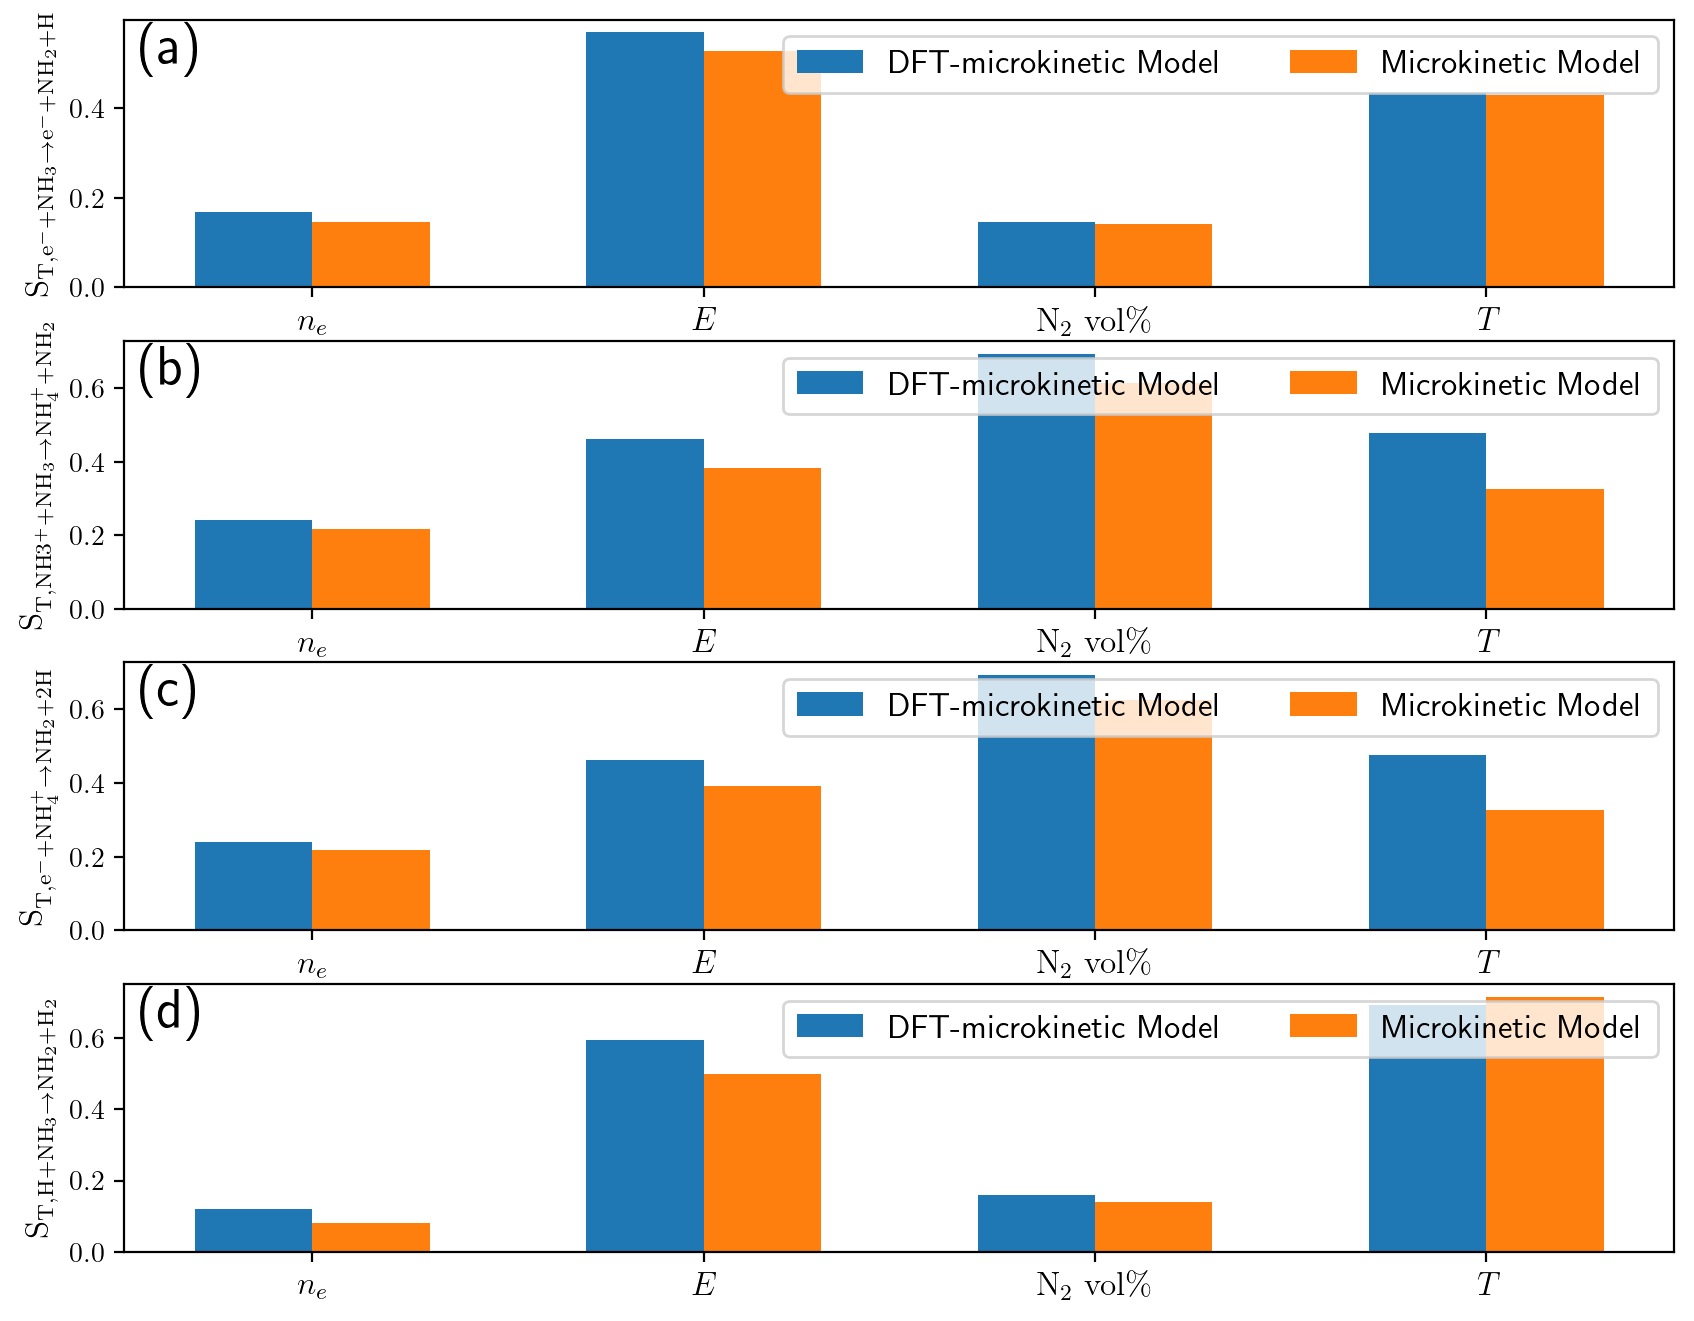

In [126]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(4, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_3\rightarrow\mathrm{e}^-+\mathrm{NH}_2+\mathrm{H}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}3^++\mathrm{NH}_3\rightarrow\mathrm{NH}_4^++\mathrm{NH}_2}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_4^+\rightarrow\mathrm{NH}_2+2\mathrm{H}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}+\mathrm{NH}_3\rightarrow\mathrm{NH}_2+\mathrm{H}_2}$',]
for id_id, reac_id in enumerate([290, 335, 307, 381]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

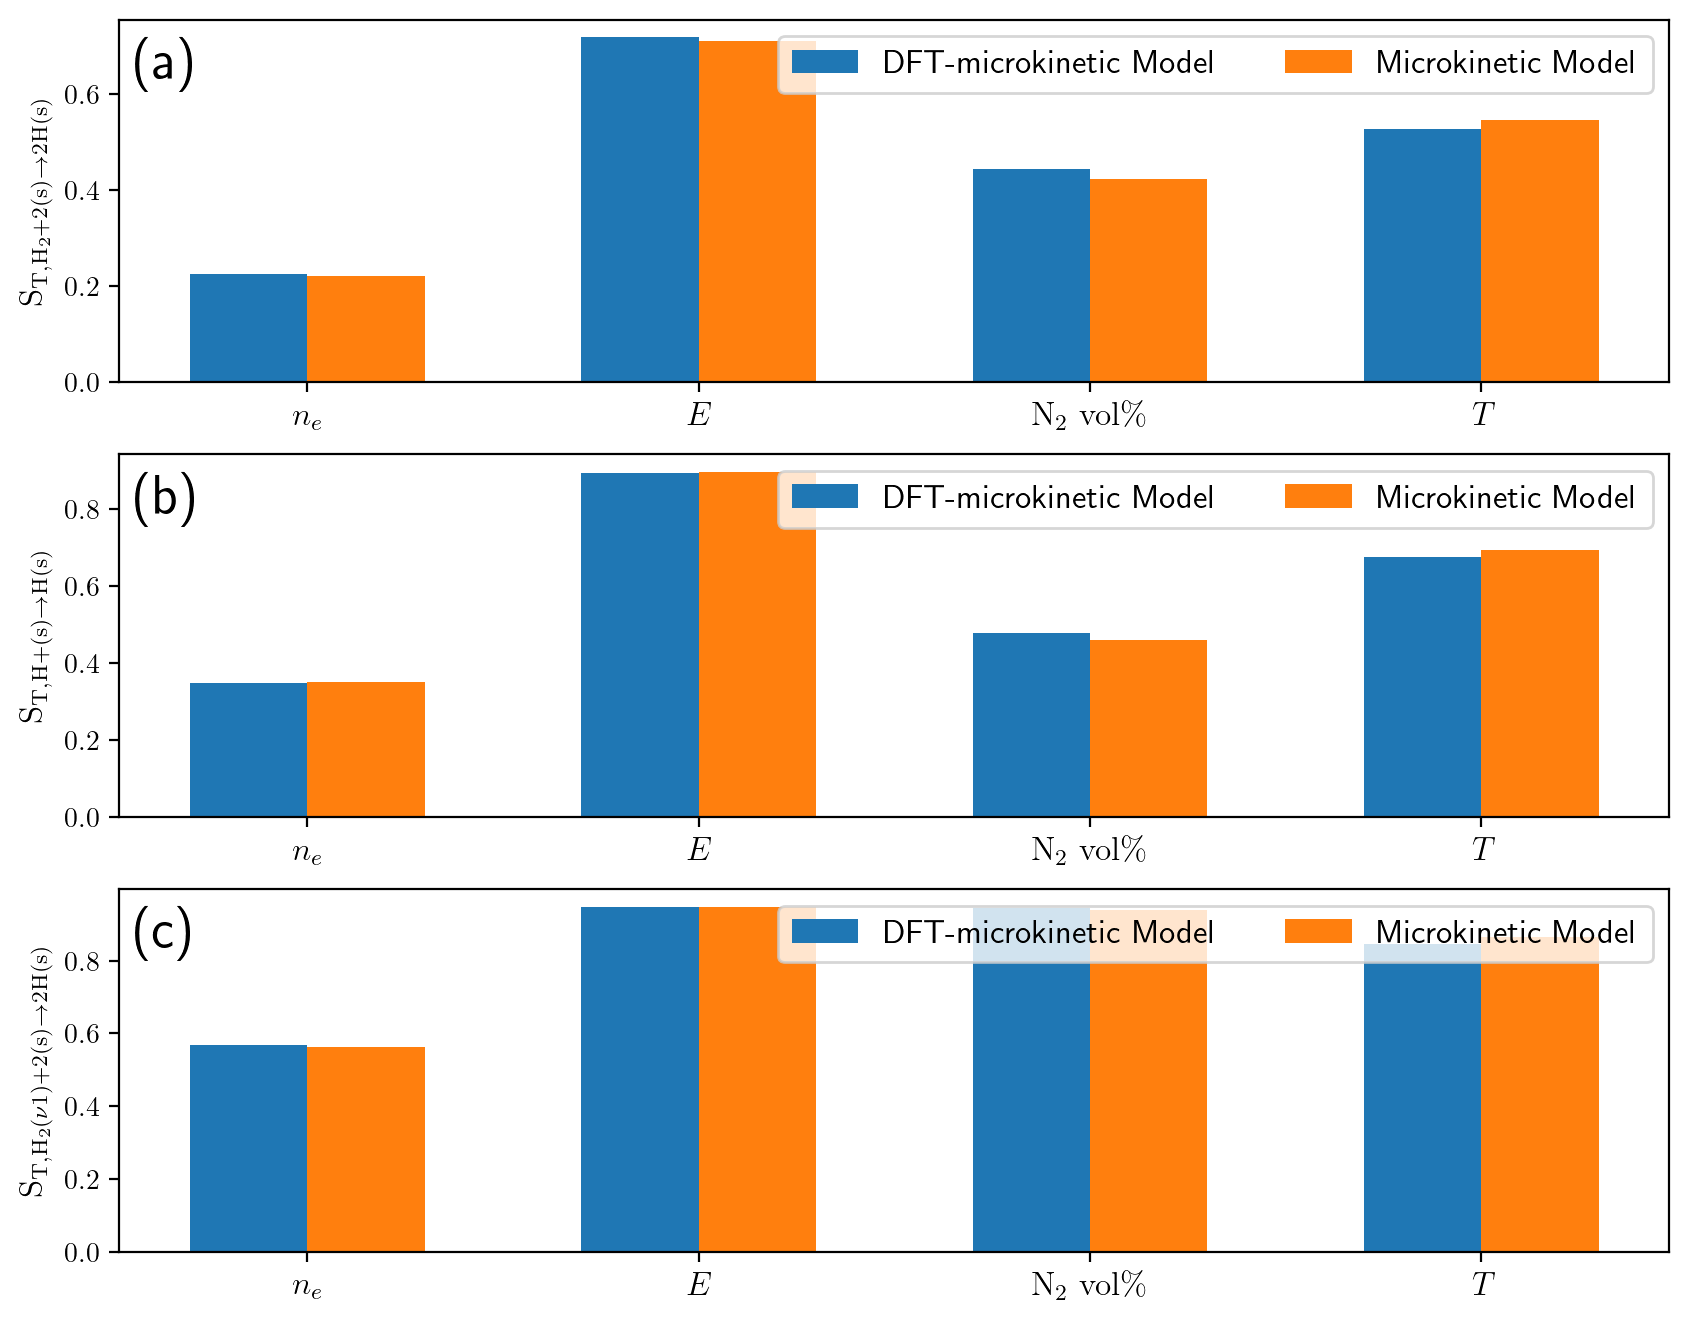

In [119]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(3, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}_2+2\mathrm{(s)}\rightarrow2\mathrm{H}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}+\mathrm{(s)}\rightarrow\mathrm{H}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}_2(\nu1)+2\mathrm{(s)}\rightarrow2\mathrm{H}\mathrm{(s)}}$']
for id_id, reac_id in enumerate([507, 472, 508]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

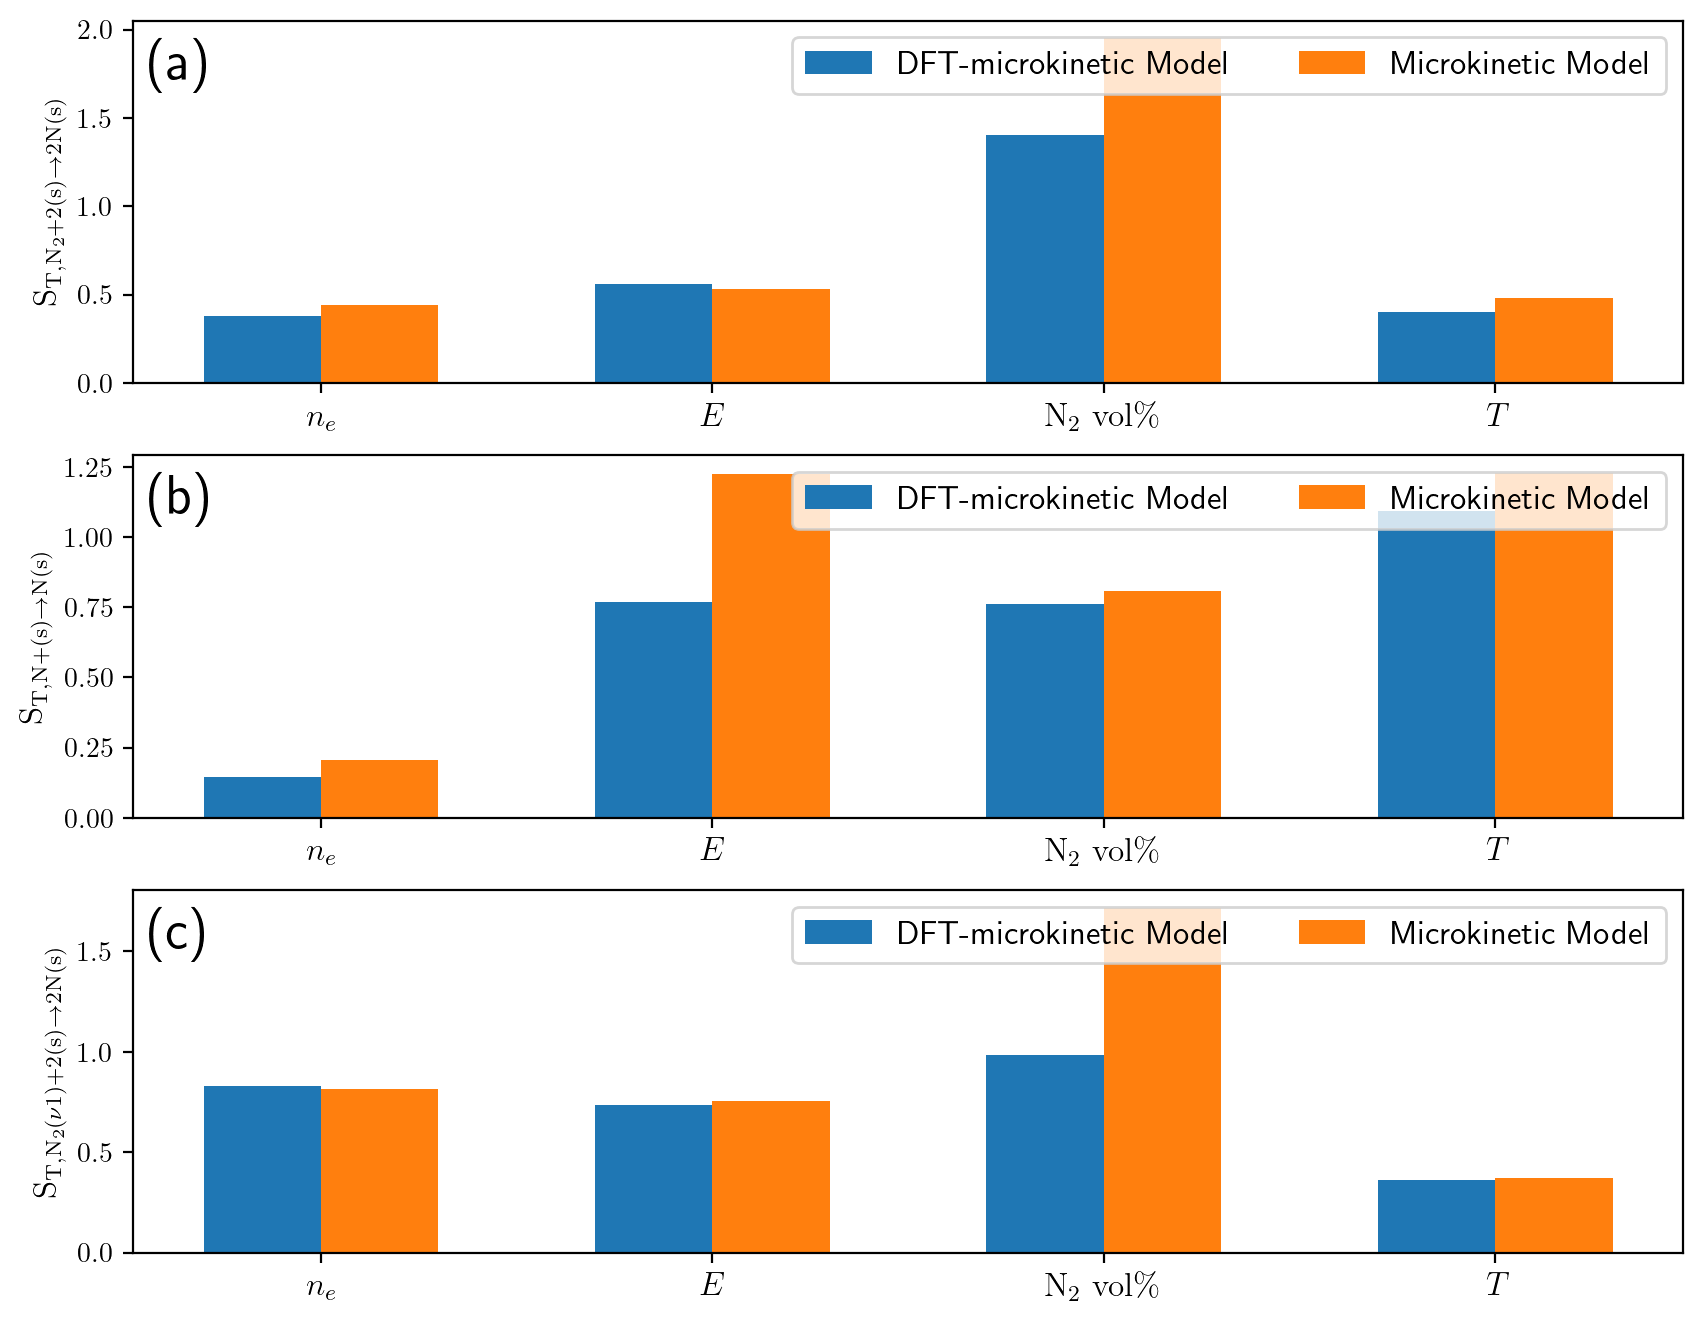

In [115]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(3, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}_2+2\mathrm{(s)}\rightarrow2\mathrm{N}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}+\mathrm{(s)}\rightarrow\mathrm{N}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}_2(\nu1)+2\mathrm{(s)}\rightarrow2\mathrm{N}\mathrm{(s)}}$']
for id_id, reac_id in enumerate([494, 469, 495]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

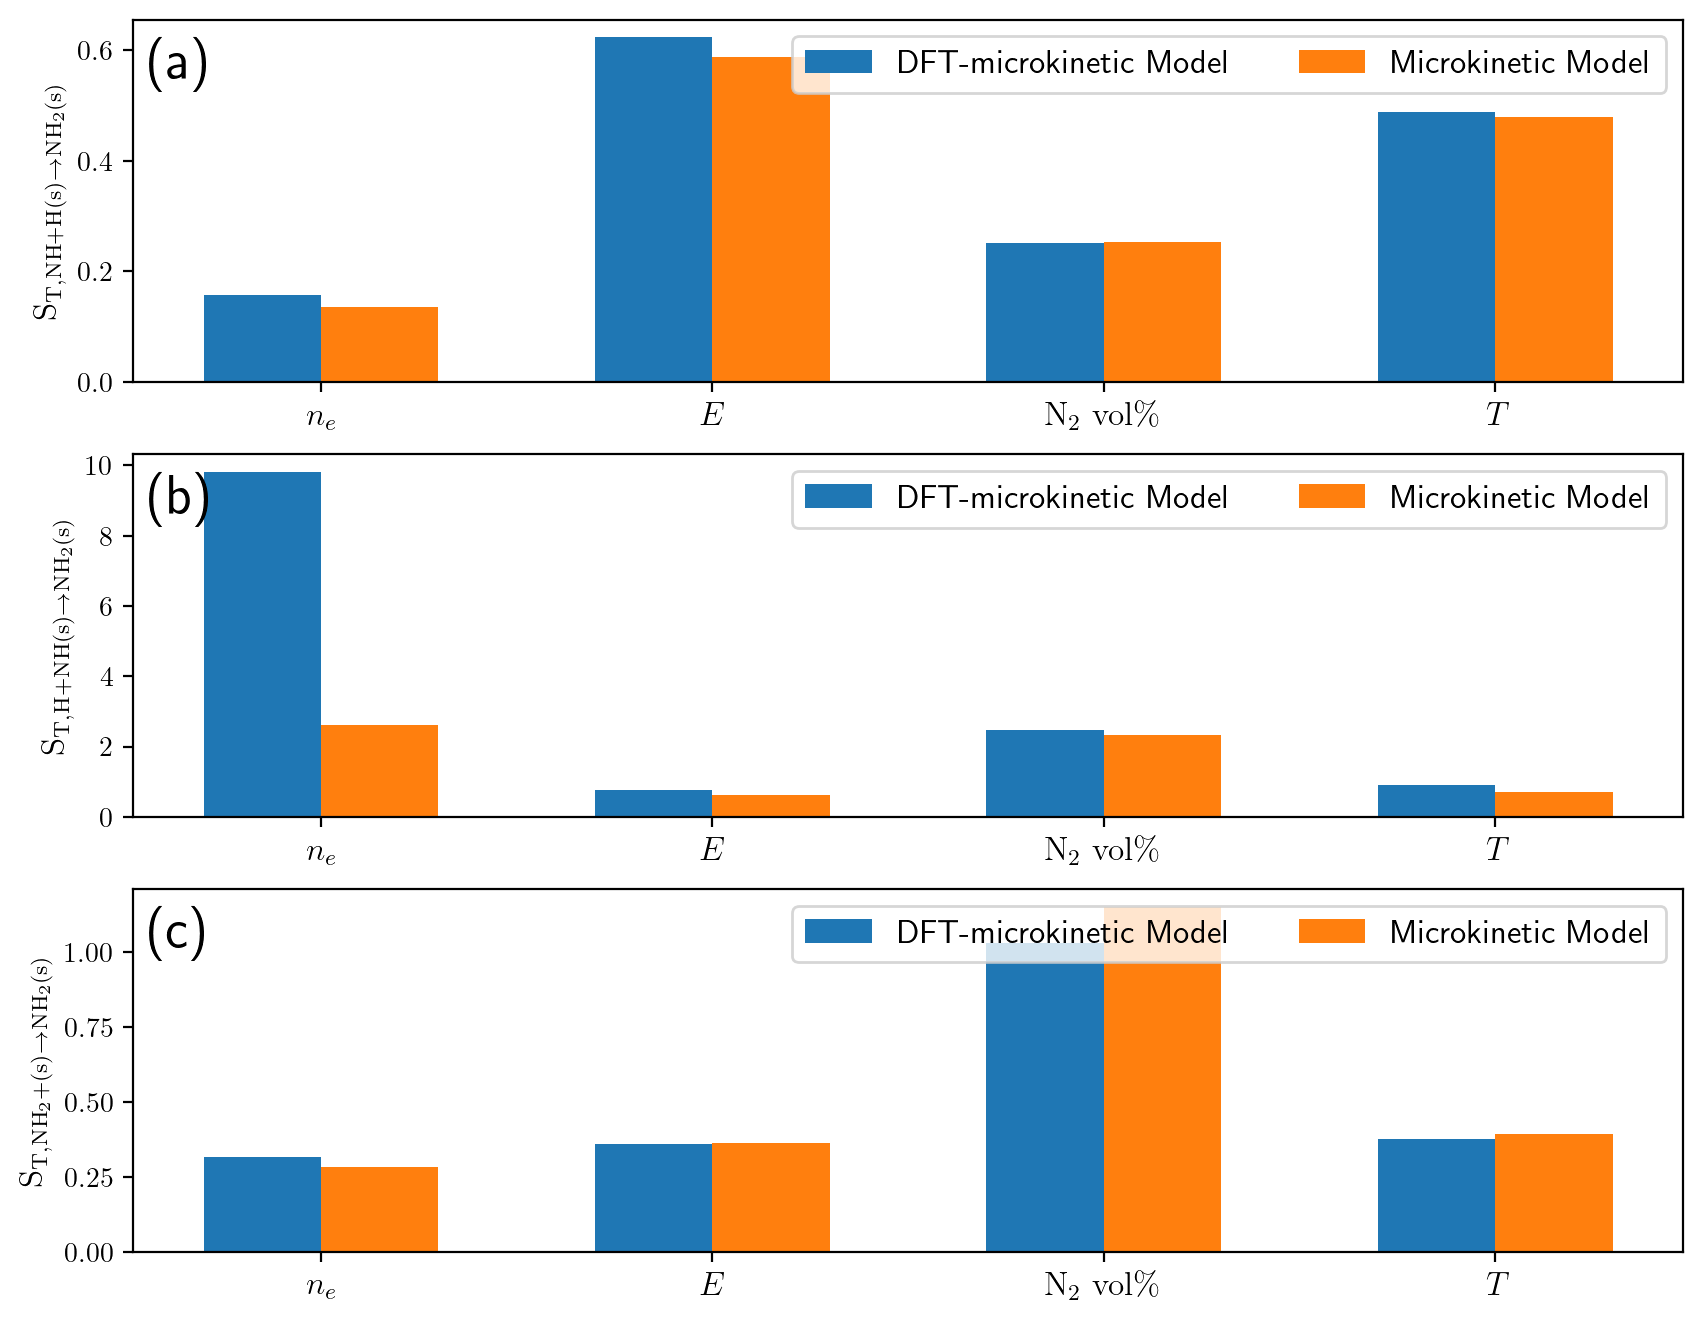

In [106]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(3, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}+\mathrm{H(s)}\rightarrow\mathrm{NH}_2\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}+\mathrm{NH(s)}\rightarrow\mathrm{NH}_2\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}_2+\mathrm{(s)}\rightarrow\mathrm{NH}_2\mathrm{(s)}}$']
for id_id, reac_id in enumerate([482, 485, 474]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

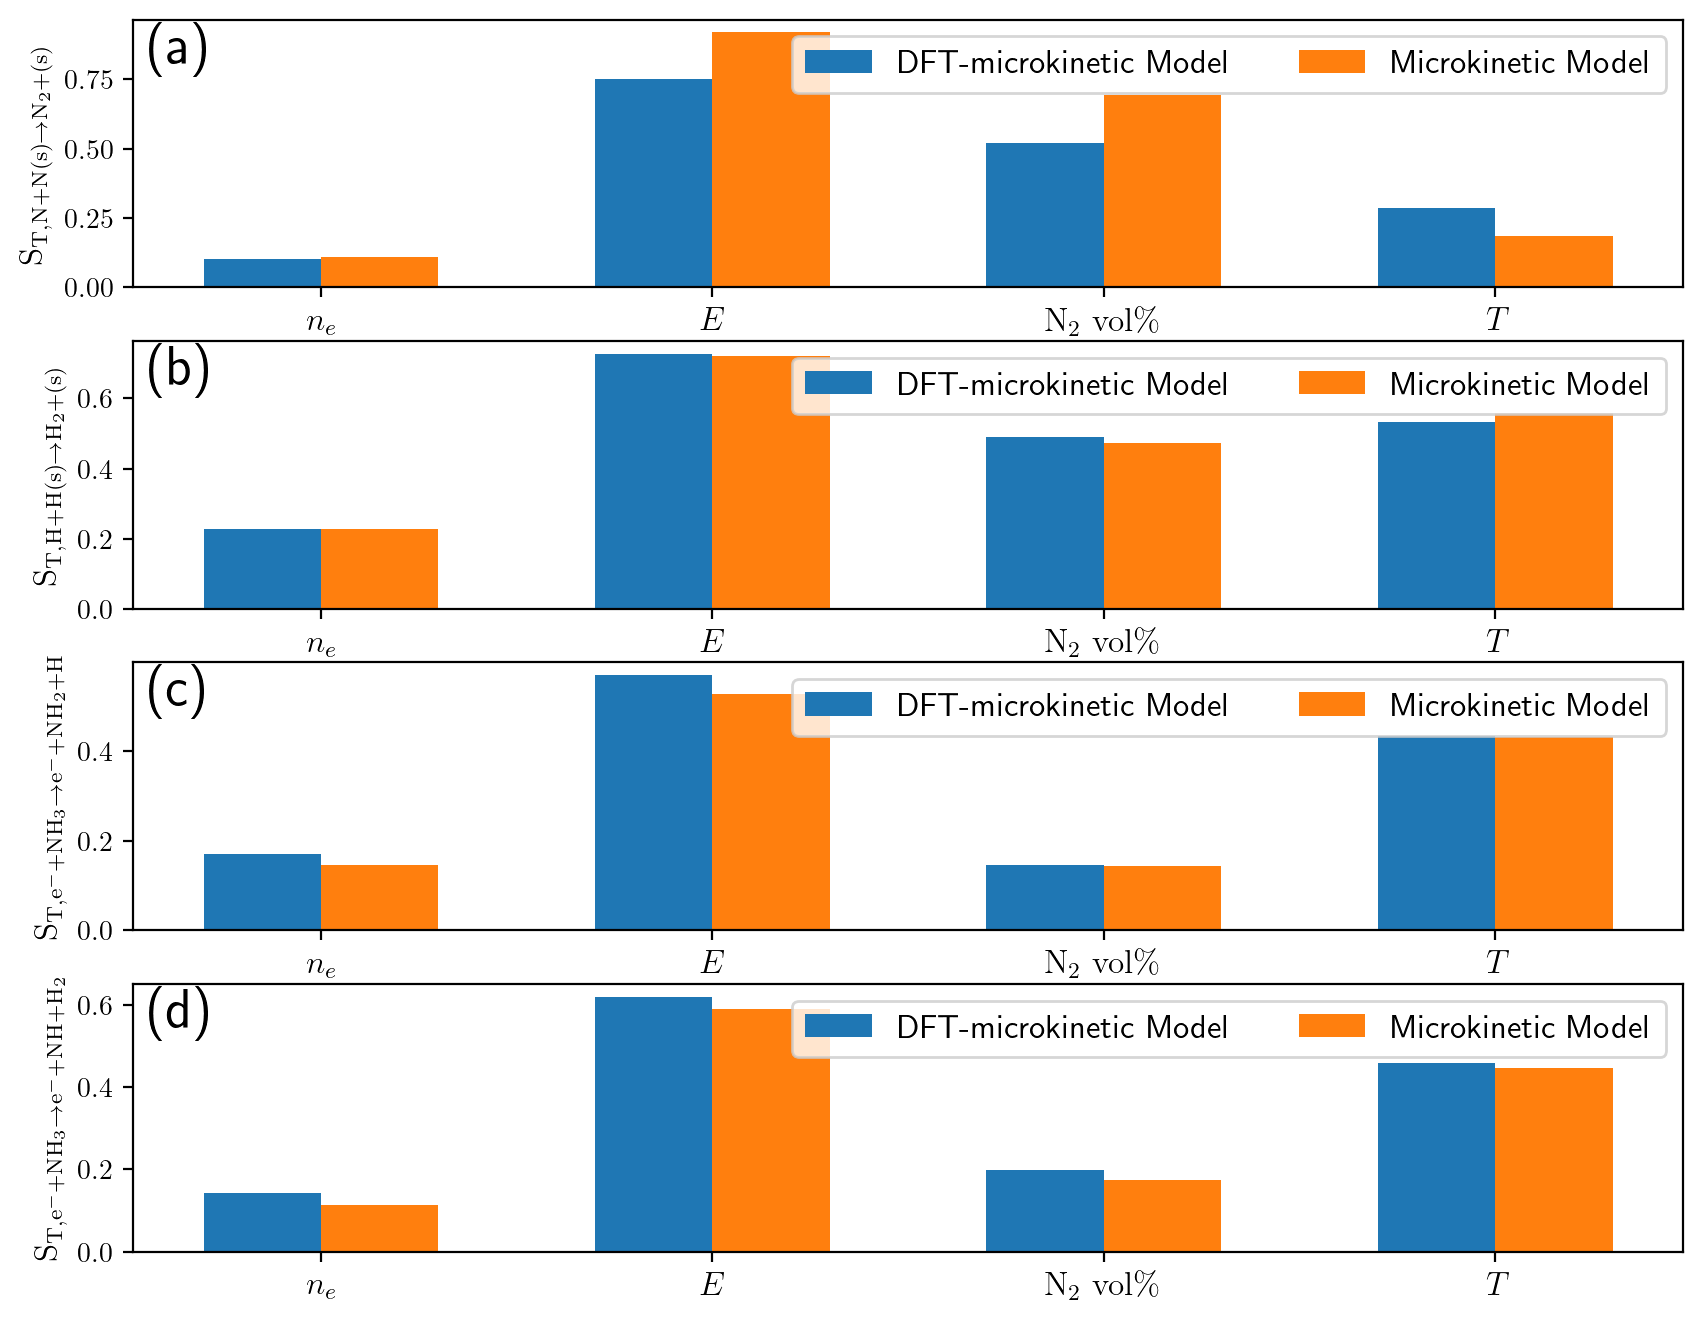

In [105]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(4, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}+\mathrm{N(s)}\rightarrow\mathrm{N}_2+\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}+\mathrm{H(s)}\rightarrow\mathrm{H}_2+\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_3\rightarrow \mathrm{e}^-+\mathrm{NH}_2+\mathrm{H}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{e}^-+\mathrm{NH}_3\rightarrow \mathrm{e}^-+\mathrm{NH}+\mathrm{H}_2}$']
for id_id, reac_id in enumerate([475, 478, 290, 291]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()

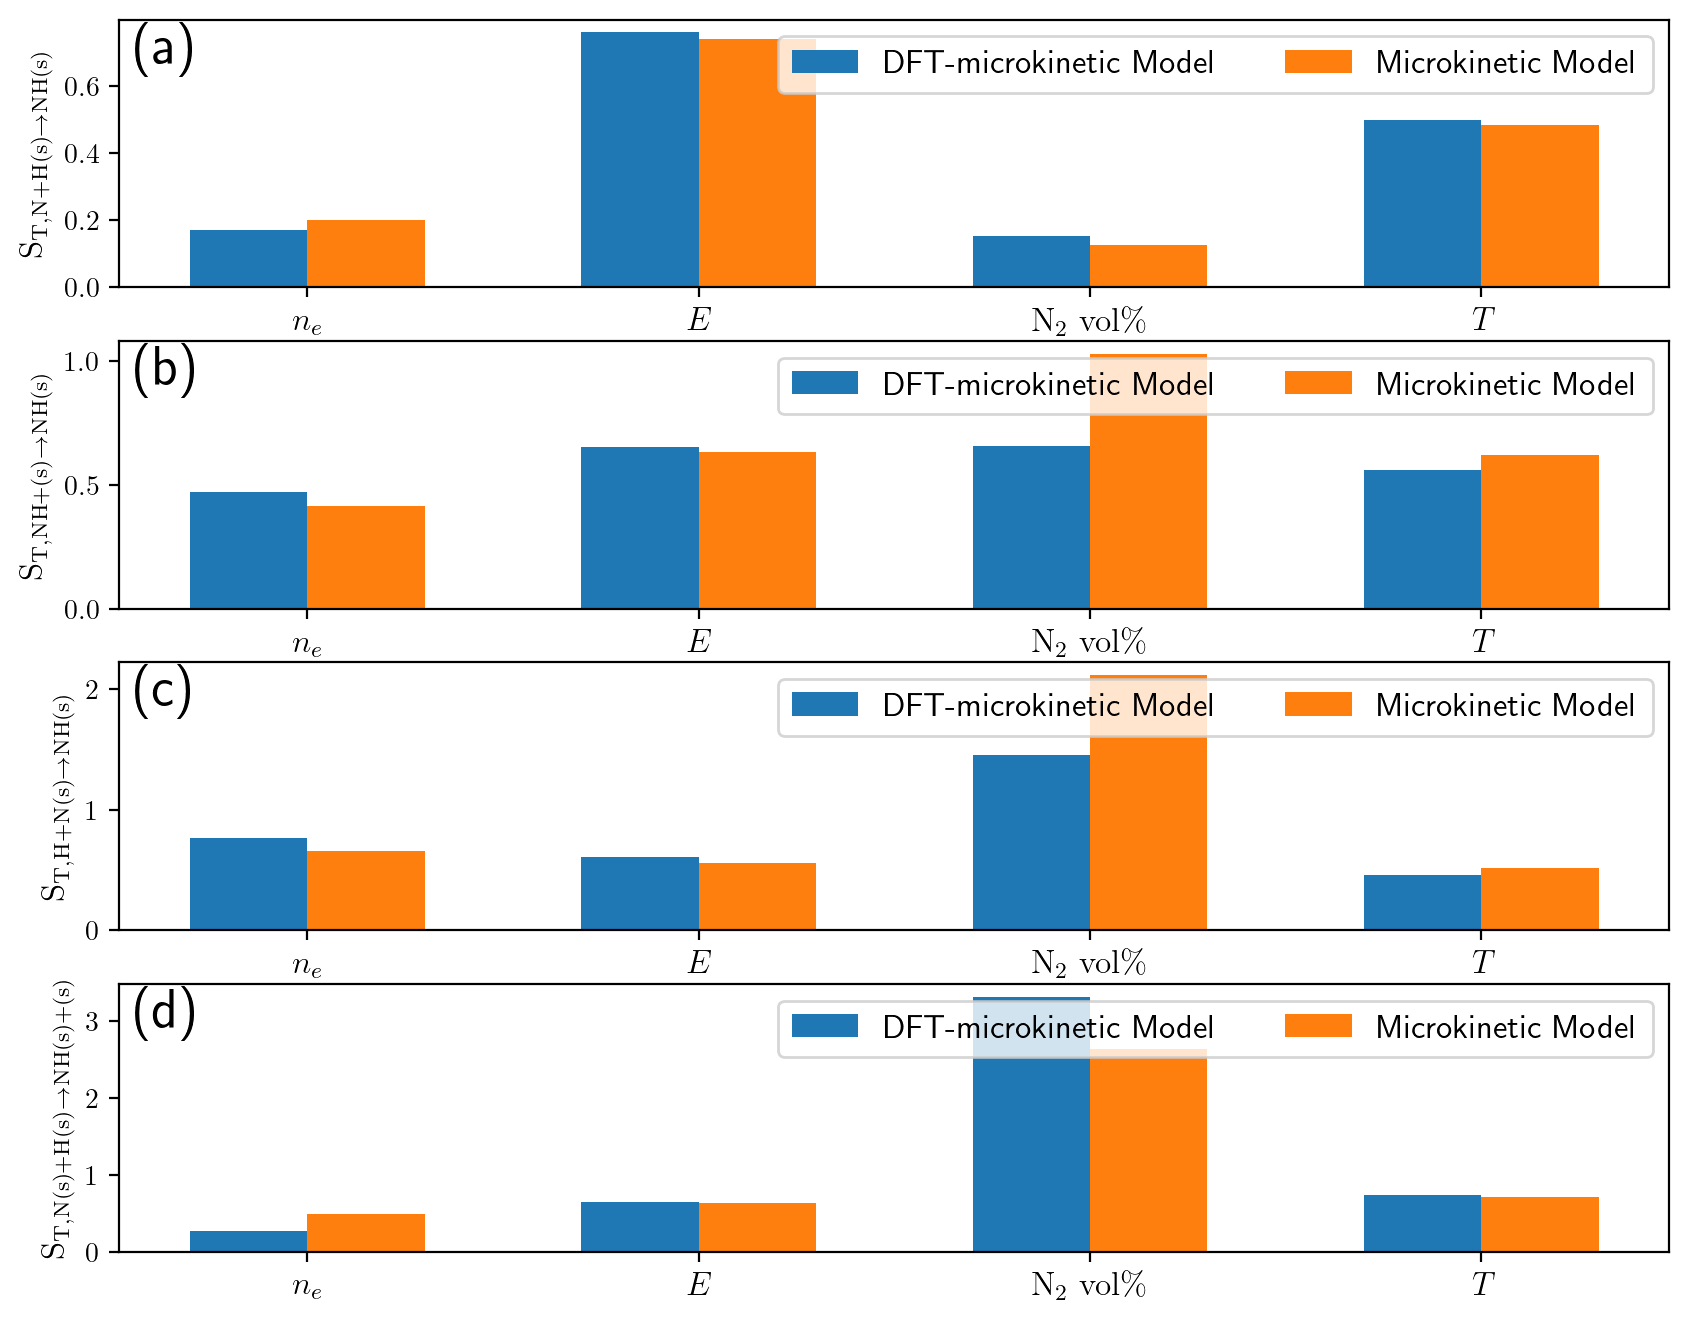

In [92]:
import pickle
import matplotlib as mpl
import string
mpl.rc('text', usetex = True)
fig, aaa = plt.subplots(4, dpi=200, figsize=(10,8))
labels = ['$n_e$', '$E$', '$\mathrm{N}_2$ $\mathrm{vol\%}$', '$T$']
leg = [r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}+\mathrm{H}\mathrm{(s)} \rightarrow \mathrm{NH}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{NH}+\mathrm{(s)} \rightarrow \mathrm{NH}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{H}+\mathrm{N}\mathrm{(s)} \rightarrow \mathrm{NH}\mathrm{(s)}}$',
       r'$\mathrm{S}_{\mathrm{T}, \mathrm{N}\mathrm{(s)}+\mathrm{H}\mathrm{(s)} \rightarrow \mathrm{NH}\mathrm{(s)}+\mathrm{(s)}}$']
for id_id, reac_id in enumerate([479, 473, 484, 491]):
    curAx = aaa[id_id]
    
    with open('./Model_SA_Const_Entropy_extract/total_res','rb') as fp:
        spec_ans_extract,reac_ans_extract,power_ans_extract = pickle.load(fp)
    with open('./Model_SA_Const_Entropy_base/total_res','rb') as fp:
        spec_ans_base,reac_ans_base,power_ans_base = pickle.load(fp)

    reac_ans_extract = np.array(reac_ans_extract)
    reac_ans_extract = reac_ans_extract[:,reac_id]
    extract_max = np.max(reac_ans_extract)
    extract_min = np.min(reac_ans_extract)
    reac_ans_extract = (reac_ans_extract-extract_min)/(extract_max-extract_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_extract) != 0.0)[0]], np.array(reac_ans_extract)[np.where(np.array(reac_ans_extract) != 0.0)[0]])
    reac_ans_extract[np.where(reac_ans_extract == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_extract == 0.0)[0]])
    NH3_Si_extract = sobol.analyze(problem, reac_ans_extract)
    
    reac_ans_base = np.array(reac_ans_base)
    reac_ans_base = reac_ans_base[:,reac_id]
    base_max = np.max(reac_ans_base)
    base_min = np.min(reac_ans_base)
    reac_ans_base = (reac_ans_base-base_min)/(base_max-base_min)
    # interpolate
    myinterpo = RBFInterpolator(param_values[np.where(np.array(reac_ans_base) != 0.0)[0]], np.array(reac_ans_base)[np.where(np.array(reac_ans_base) != 0.0)[0]])
    reac_ans_base[np.where(reac_ans_base == 0.0)[0]] = myinterpo(param_values[np.where(reac_ans_base == 0.0)[0]])
    NH3_Si_base = sobol.analyze(problem, reac_ans_base)

    x = np.arange(len(labels))/1.5 # the label locations
    width = 0.2  # the width of the bars

    #rects1 = ax.bar(x - width, NH3_Si['ST'], width, label='Fully Modified Model')
    rects2 = curAx.bar(x - 0.5*width, NH3_Si_extract['ST'], width, label='DFT-microkinetic Model')
    rects3 = curAx.bar(x + 0.5*width, NH3_Si_base['ST'], width, label='Microkinetic Model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    curAx.set_ylabel(leg[id_id], fontsize=12)

    curAx.set_xticks(x, labels, fontsize=12)
    curAx.legend(fontsize=12, ncol=2, loc='upper right')
    curAx.text(0.01, 0.84, '('+string.ascii_lowercase[id_id]+')', transform=curAx.transAxes, 
        size=20, weight='bold')
plt.show()